In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [4]:
data=dataset.copy()

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['stroke']):
  strat_train_set=data.loc[train_index]
  strat_test_set=data.loc[test_index]

In [7]:
data=strat_train_set.copy()

In [8]:
predictor_variables=list(data.columns)

In [9]:
predictor_variables.remove('stroke')

In [10]:
target_variables=['stroke']

In [11]:
character_variables=[variable for variable in data.columns if data[variable].dtypes=='O']

In [12]:
character_variables

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [13]:
numeric_variables=[variable for variable in data.columns if data[variable].dtypes!='O']

In [14]:
numeric_variables

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [15]:
categorical_variables=[feature for feature in data.columns if len(data[feature].value_counts())<25]

In [16]:
len(categorical_variables)

8

In [17]:
continuous_variables=[feature for feature in data.columns if len(data[feature].value_counts())>25]

In [18]:
len(continuous_variables)

4

In [19]:
##Univariate analysis

In [20]:
data[continuous_variables].describe()

,id,age,avg_glucose_level,bmi
count,4088.000000,4088.000000,4088.000000,3918.000000
mean,36547.666585,43.353288,106.317167,28.922180
std,21238.482961,22.596816,45.259652,7.928378
min,77.000000,0.080000,55.120000,10.300000
25%,17621.500000,26.000000,77.312500,23.600000
50%,36963.500000,45.000000,91.945000,28.000000
75%,54787.750000,61.000000,114.197500,33.100000
max,72940.000000,82.000000,271.740000,97.600000


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


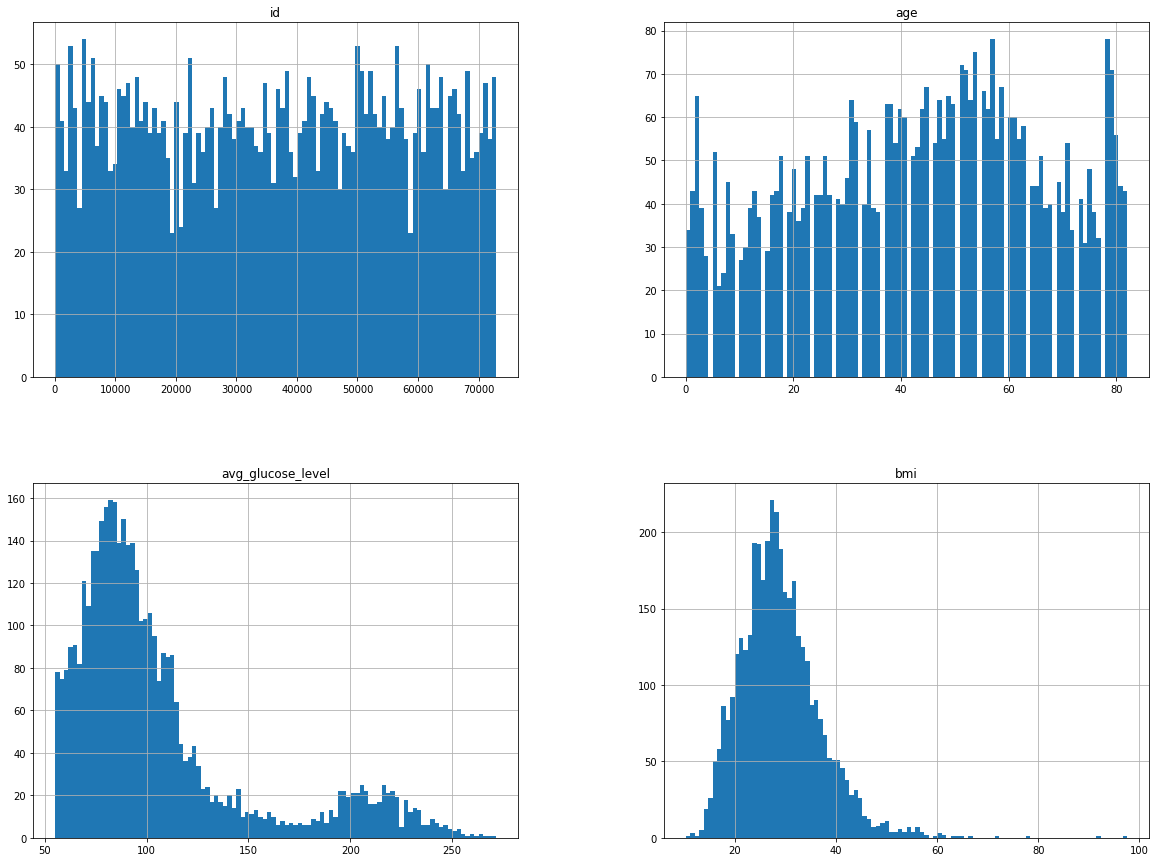

In [21]:
data[continuous_variables].hist(bins=100,figsize=(20,15))
plt.show()

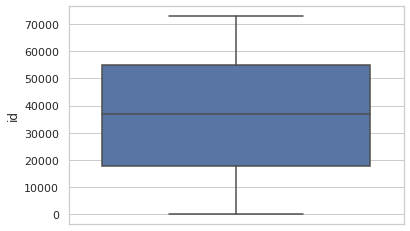

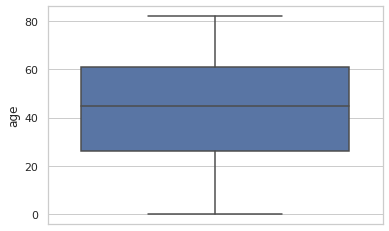

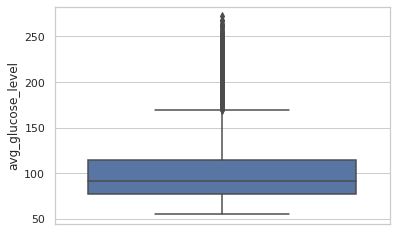

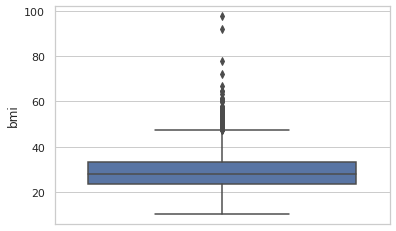

In [22]:
sns.set_theme(style="whitegrid")
for feature in continuous_variables:
  sns.boxplot(y=data[feature])
  plt.show()

In [23]:
for feature in categorical_variables:
  print((data[feature].value_counts()/len(data)))

Female    0.585861
Male      0.413894
Other     0.000245
Name: gender, dtype: float64
0    0.902886
1    0.097114
Name: hypertension, dtype: float64
0    0.945939
1    0.054061
Name: heart_disease, dtype: float64
Yes    0.66047
No     0.33953
Name: ever_married, dtype: float64
Private          0.570450
Self-employed    0.163160
children         0.135519
Govt_job         0.127691
Never_worked     0.003180
Name: work_type, dtype: float64
Urban    0.506115
Rural    0.493885
Name: Residence_type, dtype: float64
never smoked       0.367172
Unknown            0.305039
formerly smoked    0.174658
smokes             0.153131
Name: smoking_status, dtype: float64
0    0.951321
1    0.048679
Name: stroke, dtype: float64


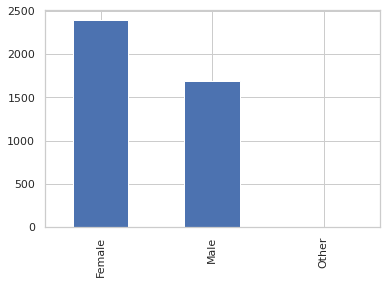

<Figure size 360x360 with 0 Axes>

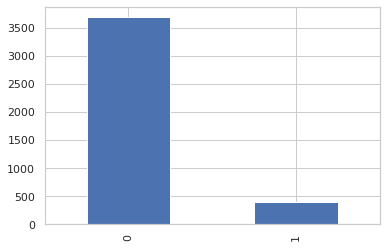

<Figure size 360x360 with 0 Axes>

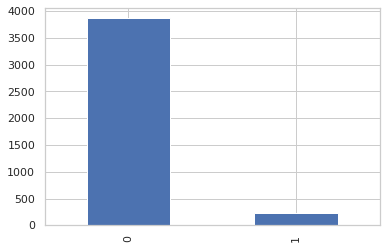

<Figure size 360x360 with 0 Axes>

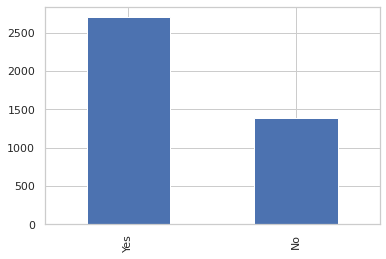

<Figure size 360x360 with 0 Axes>

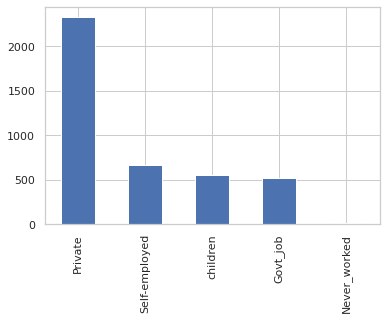

<Figure size 360x360 with 0 Axes>

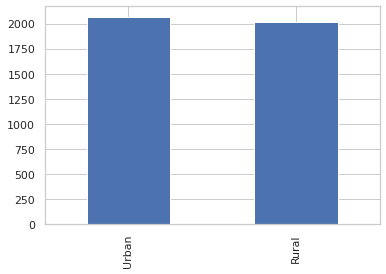

<Figure size 360x360 with 0 Axes>

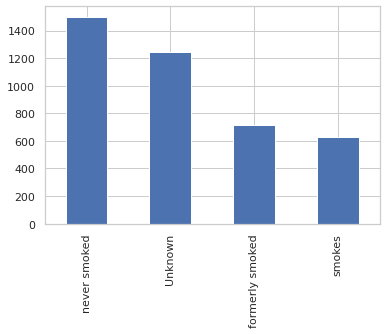

<Figure size 360x360 with 0 Axes>

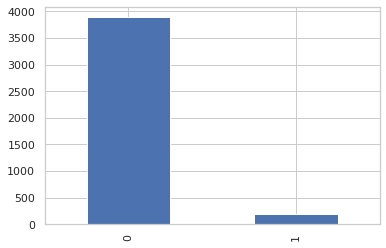

<Figure size 360x360 with 0 Axes>

In [24]:
for feature in categorical_variables:
  data[feature].value_counts().plot(kind='bar')
  plt.figure(figsize=(5,5))
  plt.show()

In [25]:
##bivariate analysis

In [26]:
##for variable in continuous_variables:
##    sns.boxplot(x=variable,y='stroke',data=data)
##    plt.show()

In [27]:
for variable in categorical_variables:
  data_crosstab = pd.crosstab(data['stroke'], 
                            data[variable],
                                margins = False)
  print(data_crosstab)
  print('\n')

gender  Female  Male  Other
stroke                     
0         2283  1605      1
1          112    87      0


hypertension     0    1
stroke                 
0             3546  343
1              145   54


heart_disease     0    1
stroke                  
0              3704  185
1               163   36


ever_married    No   Yes
stroke                  
0             1365  2524
1               23   176


work_type  Govt_job  Never_worked  Private  Self-employed  children
stroke                                                             
0               494            13     2217            612       553
1                28             0      115             55         1


Residence_type  Rural  Urban
stroke                      
0                1928   1961
1                  91    108


smoking_status  Unknown  formerly smoked  never smoked  smokes
stroke                                                        
0                  1209              658          1430     592
1  

In [28]:
##Handling missing values

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
df=data.copy()
cat_imp=SimpleImputer(strategy='most_frequent')
cont_imp=SimpleImputer(strategy='median')
list_cat=[v for v in categorical_variables if v!='stroke']
df[list_cat]=cat_imp.fit_transform(df[list_cat])
df[continuous_variables]=cont_imp.fit_transform(df[continuous_variables])


In [31]:
data=df

In [32]:
##outlier_detection

In [33]:
## converting character encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.compose import ColumnTransformer

In [36]:
full_pipeline=ColumnTransformer([
                                 ('num',StandardScaler(),[variable for variable in numeric_variables if variable!='stroke']),
                                 ('cat',OneHotEncoder(),character_variables)
])

In [37]:
data_prepared=full_pipeline.fit_transform(data)

In [38]:
data_prepared

array([[-0.5304543 ,  0.20566087, -0.32796178, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33840517, -1.25490055, -0.32796178, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49752263,  1.04659017, -0.32796178, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.21472057,  0.78103355, -0.32796178, ...,  1.        ,
         0.        ,  0.        ],
       [-1.5443042 , -0.54674956, -0.32796178, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22187286, -1.65323548, -0.32796178, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
data_prepared.shape

(4088, 22)

In [40]:
X=data_prepared.copy()

In [41]:
y=data['stroke']

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [43]:
score=cross_val_score(RandomForestClassifier(max_depth=2),X,y,cv=10)

In [44]:
score.mean()

0.9513213720696102

In [45]:
score=cross_val_score(LogisticRegression(),X,y,cv=3)

In [46]:
score.mean()

0.9515655519320666

In [47]:
score=cross_val_score(SVC(),X,y,cv=3)

In [48]:
score.mean()

0.9513209933602886

In [49]:
rnd_clf=RandomForestClassifier(max_depth=2)

In [50]:
rnd_clf.fit(X,y)

RandomForestClassifier(max_depth=2)

In [51]:
## creating the test set

In [52]:
X_test=strat_test_set

In [53]:
y_test=X_test['stroke']

In [54]:
X_test[list_cat]=cat_imp.transform(X_test[list_cat])

In [55]:
X_test[continuous_variables]=cont_imp.transform(X_test[continuous_variables])

In [56]:
X_test=full_pipeline.transform(X_test)

In [57]:
y_pred=rnd_clf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
score=accuracy_score(y_test,y_pred)

In [60]:
score

0.9510763209393346